In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
dictionary = pd.read_csv('taxi+_zone_lookup.csv')

In [43]:
dictionary.head()
#bad locations: 0, 265, 264

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [161]:
data = pd.read_csv( 'nhbr_data2.csv', names = ['PU','DO','$','passengers','week_trips','wend_trips'])
data.head()

,PU,DO,$,passengers,week_trips,wend_trips
0,[261,56,2069.06,89,32,20]
1,[209,86,428.70,9,4,1]
2,[52,100,3828.13,180,93,27]
3,[244,119,3672.82,550,194,134]
4,[220,186,78.64,2,1,1]


In [221]:
def look_up(loc_id):
    return dictionary[dictionary['LocationID'] == loc_id]['Zone'].values[0]

data = pd.read_csv( 'nhbr_data2.csv', names = ['PU','DO','$','passengers','week_trips','wend_trips']
                  )
data['PU'] = data['PU'].str[1:]
data['wend_trips'] = data['wend_trips'].str[:-1]

data['wend_trips'] = pd.to_numeric(data['wend_trips'], errors='coerce')
data['PU'] = pd.to_numeric(data['PU'], errors='coerce')
data['DO'] = pd.to_numeric(data['DO'], errors='coerce')

data['occurences'] = data['week_trips'] + data['wend_trips']

data = data[ (data['DO'] != 0) & (data['PU'] != 0)
            & (data['DO'] != 265) & (data['PU'] != 265)
            & (data['DO'] != 264) & (data['PU'] != 264)  ]

data['PU_nhbr'] = data['PU'].apply(lambda x: look_up(x))
data['DO_nhbr'] = data['DO'].apply(lambda x: look_up(x))

data['fun_ratio'] = data['wend_trips']/(data['week_trips']+data['wend_trips'])

data.head()

,PU,DO,$,passengers,week_trips,wend_trips,occurences,PU_nhbr,DO_nhbr,fun_ratio
0,261,56,2069.06,89,32,20,52,World Trade Center,Corona,0.384615
1,209,86,428.70,9,4,1,5,Seaport,Far Rockaway,0.200000
2,52,100,3828.13,180,93,27,120,Cobble Hill,Garment District,0.225000
3,244,119,3672.82,550,194,134,328,Washington Heights South,Highbridge,0.408537
4,220,186,78.64,2,1,1,2,Spuyten Duyvil/Kingsbridge,Penn Station/Madison Sq West,0.500000


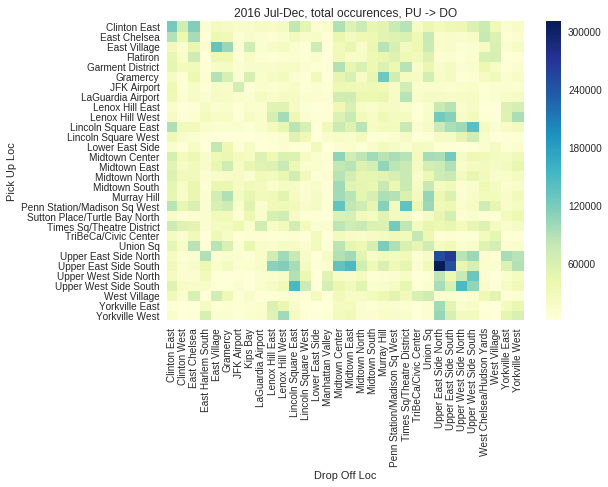

In [256]:
import seaborn as sns; sns.set()

#c1 = sns.palplot(sns.color_palette("BrBG", 7))
#coolwarm = sns.palplot(sns.color_palette("coolwarm", 7))
default = sns.cubehelix_palette(light=1, as_cmap=True)

def matrix(string, colors = default, avg = False, centered=False ):
    
    display = data.sort_values(by=string, ascending = False)#, ascending=[1, 0])
    if string=='fun_ratio':
        display = data.sort_values(by='occurences', ascending = False)
    display = display.iloc[0:150 ,:]
    
    flights = display.pivot("PU_nhbr", "DO_nhbr", string).fillna(0)
    for index, row in flights.iterrows():
        for col in row.index:
            value = data[(data['DO_nhbr'] == col) & (
                    data['PU_nhbr'] == index)][string].values
            # passenger per trip or $ per trip
            if avg:
                value /= data[(data['DO_nhbr'] == col) & (
                    data['PU_nhbr'] == index)]['occurences']
            flights = flights.set_value(
                index, col, value[0])
                
    # to stop centering the heatmap at
    # median value, comment out center argument
    if centered:
        ax= sns.heatmap(flights, cmap = colors, center = display[string].median())
    else:
        ax= sns.heatmap(flights, cmap= colors)#, center = display[string].median())#,cmap=cmap)
    plt.title('2016 Jul-Dec, total %s, PU -> DO' %(string) )
    plt.ylabel('Pick Up Loc')
    plt.xlabel('Drop Off Loc')
    if avg:
        plt.title('2016 Jul-Dec, avg %s per trips PU -> DO' %(string) )
    
matrix('occurences', "YlGnBu")

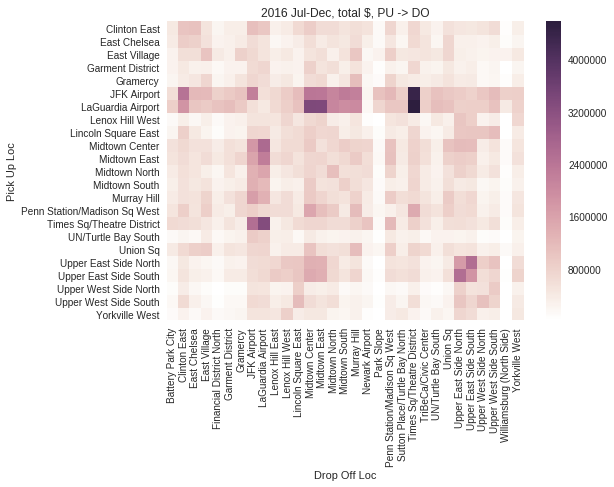

In [257]:
matrix('$')
#"Spectral"
#"BrBG"

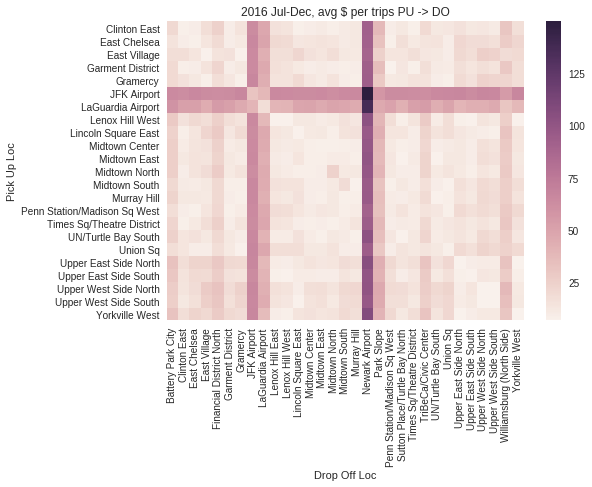

In [238]:
matrix('$', avg=True)

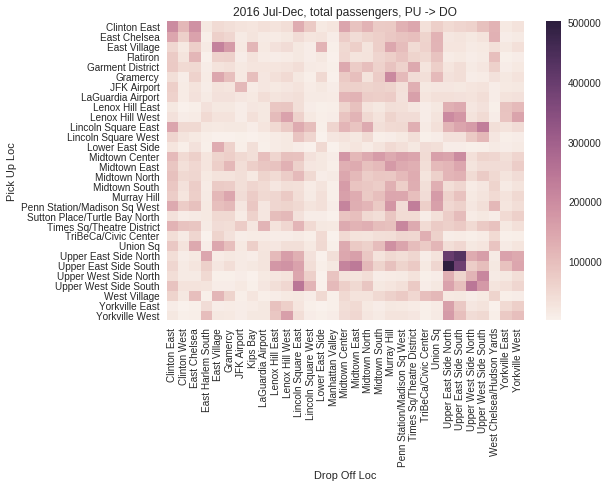

In [239]:
matrix('passengers')

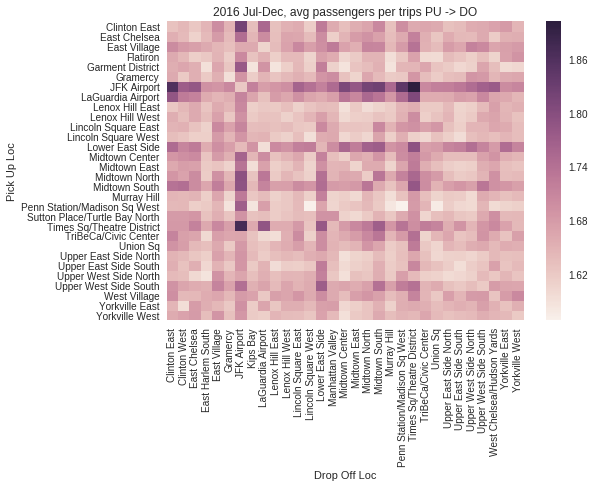

In [219]:
matrix('passengers', avg=True)

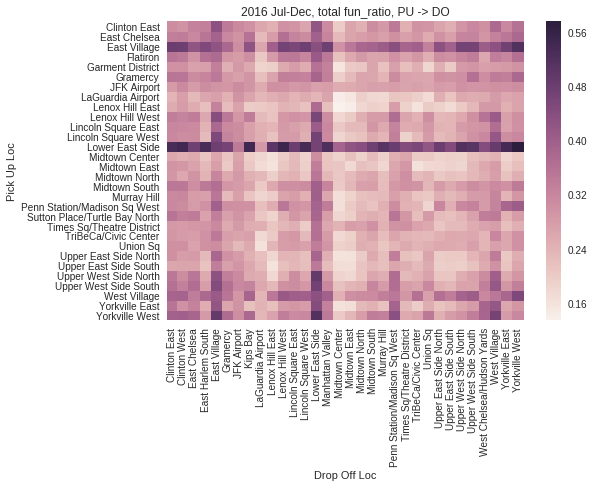

In [243]:
matrix('fun_ratio')

In [156]:

# http://seaborn.pydata.org/generated/seaborn.heatmap.html
#>>> import numpy as np; np.random.seed(0)
#>>> import seaborn as sns; sns.set()
#>>> flights = sns.load_dataset("flights")
#>>> flights = flights.pivot("month", "year", "passengers")
#flights
#plt.xticks(rotation=90)
#>>> ax = sns.heatmap(flights)